In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [119]:
from sklearn.datasets import fetch_california_housing

In [120]:
california_df = fetch_california_housing()

In [123]:
print(california_df .DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [125]:
df = pd.DataFrame(california_df.data , columns = california_df.feature_names)

In [126]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [127]:
df['Price'] = california_df.target

In [128]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [129]:
df.shape

(20640, 9)

In [130]:
df = df.sample(frac =0.25)

In [131]:
df.shape

(5160, 9)

In [132]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [133]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3015,3.0882,14.0,7.001727,1.359240,1581.0,2.730570,34.95,-119.16
9199,2.7813,10.0,5.304786,1.032746,1003.0,2.526448,37.39,-119.66
1710,4.2348,25.0,6.020352,1.051804,3259.0,3.014801,37.99,-122.31
15566,6.1868,13.0,8.332326,1.126888,2119.0,3.200906,33.10,-117.05
5629,2.9571,18.0,4.968791,1.033810,2831.0,3.681404,33.77,-118.30


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [138]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4128, 8), (1032, 8), (4128,), (1032,))

In [139]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [140]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [141]:
y_pred = regressor.predict(X_test)

In [142]:
y_pred

array([0.875, 2.126, 2.519, ..., 1.954, 3.103, 1.472])

In [145]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [146]:
score

0.5550483959423399

In [155]:
##Hyperparameter tunning
parameters ={
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2'],
}
    

In [156]:
regressor = DecisionTreeRegressor()

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
clf = GridSearchCV(regressor,param_grid = parameters,scoring ='neg_mean_squared_error')

In [159]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [160]:
clf.best_params_

{'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}

In [162]:
regressor = DecisionTreeRegressor(criterion ='absolute_error',max_depth = 7, max_features ='auto',splitter ='best')

In [163]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

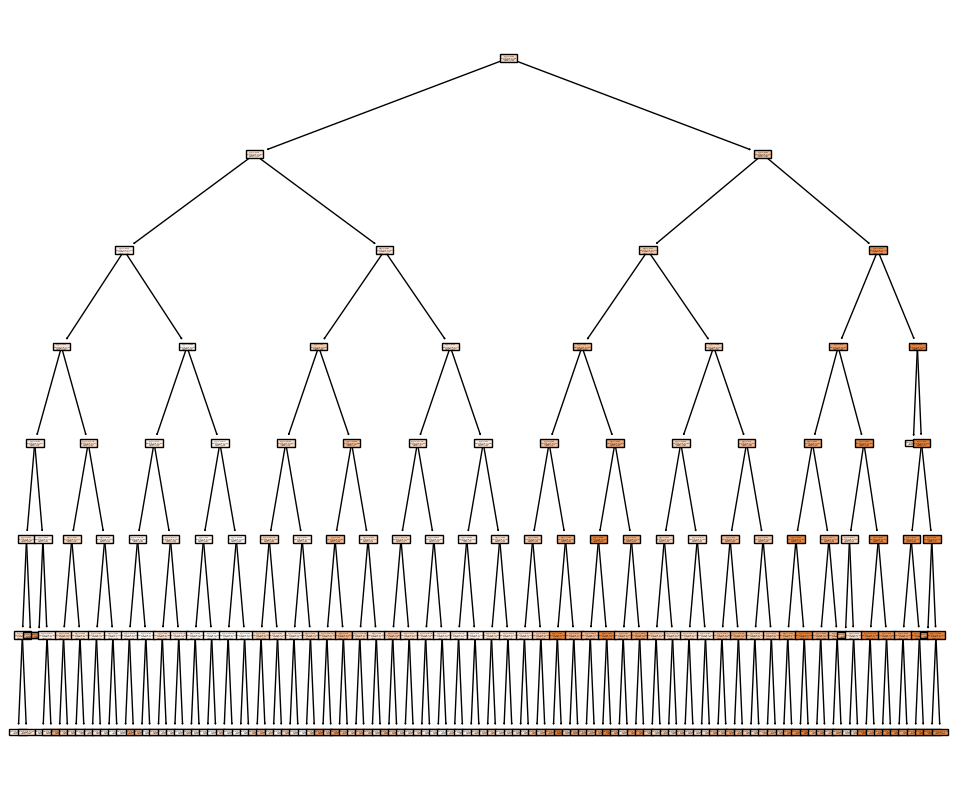

In [165]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(regressor,filled = True)
plt.show()

In [166]:
y_pred = regressor.predict(X_test)

In [167]:
y_pred

array([0.988 , 2.294 , 2.4   , ..., 1.815 , 3.1095, 1.815 ])

In [168]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [169]:
score

0.6397920645903097

In [170]:
adjusted_r2 = 1-(1-score)*(len(y_test)-1)/len(y_test)-X_test.shape[1]-1

In [171]:
adjusted_r2

-8.359858896712588